In [2]:
%matplotlib inline

In [3]:
from skimage import data
from skimage import transform as tf
from skimage.feature import (match_descriptors, corner_harris,
                             corner_peaks, ORB, plot_matches)
from skimage.color import rgb2gray
import matplotlib.pyplot as plt

## Possible preprocessing/indexing methods:
- LESH (Local Energy based Shape Histogram) https://en.wikipedia.org/wiki/LESH
- ORB feature detector and binary descriptor http://scikit-image.org/docs/dev/auto_examples/features_detection/plot_orb.html#example-features-detection-plot-orb-py
- HOG https://en.wikipedia.org/wiki/Histogram_of_oriented_gradients#SVM_classifier

## Other resources
- https://www.robots.ox.ac.uk/~vgg/publications/1992/Rothwell92a/rothwell92a.pdf
- Generalized Shape Autocorrelation (http://www.aaai.org/Papers/AAAI/1990/AAAI90-159.pdf)
- Geometric Hashing (http://www.cs.utexas.edu/~grauman/courses/spring2007/395T/papers/Lamdan88.pdf)

In [4]:
# Example from scikit-learn that we can use
# (http://scikit-image.org/docs/dev/auto_examples/features_detection/plot_orb.html#example-features-detection-plot-orb-py)
# but i really dont know what is this yet :)))

In [5]:
img1 = rgb2gray(data.astronaut())
img2 = tf.rotate(img1, 180)
tform = tf.AffineTransform(scale=(1.3, 1.1), rotation=0.5,
                           translation=(0, -200))
img3 = tf.warp(img1, tform)

In [6]:
descriptor_extractor = ORB(n_keypoints=200)

descriptor_extractor.detect_and_extract(img1)
keypoints1 = descriptor_extractor.keypoints
descriptors1 = descriptor_extractor.descriptors

descriptor_extractor.detect_and_extract(img2)
keypoints2 = descriptor_extractor.keypoints
descriptors2 = descriptor_extractor.descriptors

descriptor_extractor.detect_and_extract(img3)
keypoints3 = descriptor_extractor.keypoints
descriptors3 = descriptor_extractor.descriptors

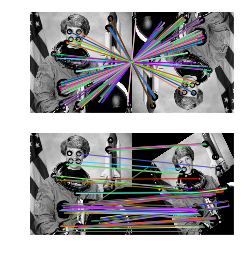

In [7]:
matches12 = match_descriptors(descriptors1, descriptors2, cross_check=True)
matches13 = match_descriptors(descriptors1, descriptors3, cross_check=True)

fig, ax = plt.subplots(nrows=2, ncols=1)

plt.gray()

plot_matches(ax[0], img1, img2, keypoints1, keypoints2, matches12)
ax[0].axis('off')

plot_matches(ax[1], img1, img3, keypoints1, keypoints3, matches13)
ax[1].axis('off')

plt.show()

# Examples on our dataset

## Apple example

In [8]:
from skimage.io import imread, imshow, show

In [9]:
im1 = imread("../database/apple-1.pgm", as_grey=True)

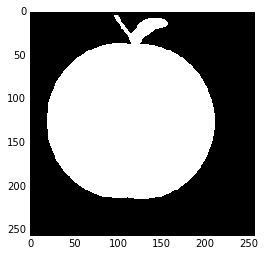

In [10]:
imshow(im1)
show()

In [12]:
im2 = tf.rotate(im1, 180)
tform = tf.AffineTransform(scale=(1.3, 1.1), rotation=0.5,
                           translation=(0, -200))
im3 = tf.warp(im1, tform)

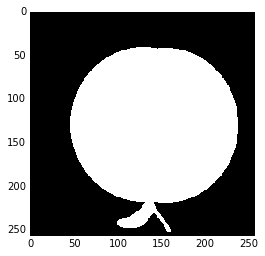

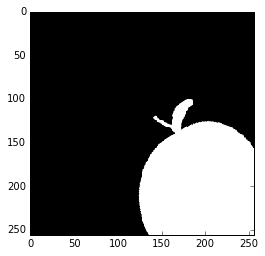

In [13]:
imshow(im2)
show()
imshow(im3)
show()

In [14]:
descriptor_extractor = ORB(n_keypoints=200)

descriptor_extractor.detect_and_extract(im1)
keypoints1 = descriptor_extractor.keypoints
descriptors1 = descriptor_extractor.descriptors

descriptor_extractor.detect_and_extract(im2)
keypoints2 = descriptor_extractor.keypoints
descriptors2 = descriptor_extractor.descriptors

descriptor_extractor.detect_and_extract(im3)
keypoints3 = descriptor_extractor.keypoints
descriptors3 = descriptor_extractor.descriptors

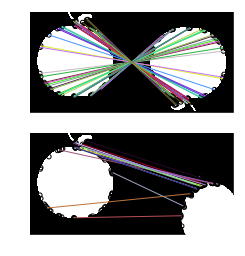

In [15]:
matches12 = match_descriptors(descriptors1, descriptors2, cross_check=True)
matches13 = match_descriptors(descriptors1, descriptors3, cross_check=True)

fig, ax = plt.subplots(nrows=2, ncols=1)

plt.gray()

plot_matches(ax[0], im1, im2, keypoints1, keypoints2, matches12)
ax[0].axis('off')

plot_matches(ax[1], im1, im3, keypoints1, keypoints3, matches13)
ax[1].axis('off')

plt.show()

## Beetle example

In [16]:
im1 = imread("../database/beetle-4.pgm", as_grey=True)

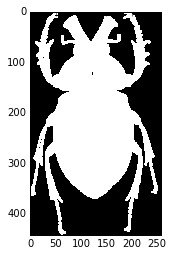

In [17]:
imshow(im1)
show()

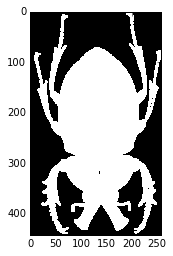

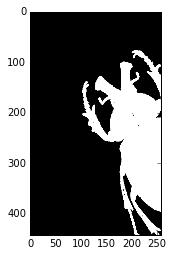

In [18]:
im2 = tf.rotate(im1, 180)
tform = tf.AffineTransform(scale=(1.3, 1.1), rotation=0.5,
                           translation=(0, -200))
im3 = tf.warp(im1, tform)

imshow(im2)
show()
imshow(im3)
show()

In [19]:
descriptor_extractor = ORB(n_keypoints=200)

descriptor_extractor.detect_and_extract(im1)
keypoints1 = descriptor_extractor.keypoints
descriptors1 = descriptor_extractor.descriptors

descriptor_extractor.detect_and_extract(im2)
keypoints2 = descriptor_extractor.keypoints
descriptors2 = descriptor_extractor.descriptors

descriptor_extractor.detect_and_extract(im3)
keypoints3 = descriptor_extractor.keypoints
descriptors3 = descriptor_extractor.descriptors

In [ ]:
# Display the image and plot all contours found
fig, ax = plt.subplots()
ax.imshow(r, interpolation='nearest', cmap=plt.cm.gray)

for n, contour in enumerate(contours):
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
plt.show()


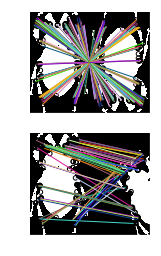

In [20]:
matches12 = match_descriptors(descriptors1, descriptors2, cross_check=True)
matches13 = match_descriptors(descriptors1, descriptors3, cross_check=True)

fig, ax = plt.subplots(nrows=2, ncols=1)

plt.gray()

plot_matches(ax[0], im1, im2, keypoints1, keypoints2, matches12)
ax[0].axis('off')

plot_matches(ax[1], im1, im3, keypoints1, keypoints3, matches13)
ax[1].axis('off')

plt.show()

In [77]:
# Strategy we may adopt:
# - Find contours
# - Extract outer contour
# - (later we can include inner contours to descriptor too)
# - Find nice geometrical robust descriptors of the outer contour

In [78]:
from skimage import measure

contours = measure.find_contours(im1, level=0.1)

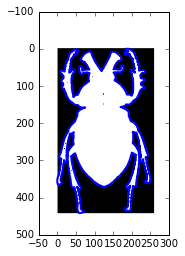

In [76]:
fig, ax = plt.subplots()
ax.imshow(im1)
ax.plot(contours[0][:, 1], contours[0][:, 0], linewidth=2)